In [1]:
from datetime import datetime
import pandas as pd
import seaborn as sns
import os
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud
from itertools import combinations
import networkx as nx
import sys

%matplotlib inline

In [2]:
import gensim
from gensim.models import Word2Vec

C:\Users\amore\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [4]:
import insta_crwal.Insta_Crwaling_Anal as insta

In [9]:
# ÌÅ¨Î°§ÎßÅ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [5]:
fname = './data/arittaum_3723_total.csv'
datas = insta.load_crwal_datas(fname)

In [6]:
print(len(datas))

3723


In [7]:
datas.dtypes

Ôªøwriter         object
article         object
likes            int64
replys_count     int64
replys          object
datetime        object
img             object
tags            object
dtype: object

# ÏãúÍ≥ÑÏó¥ Ìä∏Î†åÎìú ÏÇ¥Ìé¥Î≥¥Í∏∞

In [8]:
insta_trends = insta.insta_trends_analyser(datas)

In [22]:
insta_trends  # 11/10 ~ 12/21 Îç∞Ïù¥ÌÑ∞ 3723Í∞ú

article  replies    likes      sum
day                                           
2017-11-10       12       28      471      511
2017-11-11       42      247     3456     3745
2017-11-12       53      385     6357     6795
2017-11-13       49      268     3092     3409
2017-11-14       44      290     4727     5061
2017-11-15       79      314    11835    12228
2017-11-16       83      282    19788    20153
2017-11-17       69      339     9822    10230
2017-11-18       76      348     3271     3695
2017-11-19       64      375     3351     3790
2017-11-20       80      359     3656     4095
2017-11-21       60      469   202393   202922
2017-11-22       88      763    23960    24811
2017-11-23       90      466    10453    11009
2017-11-24       84      506     6791     7381
2017-11-25       91      566     7386     8043
2017-11-26       83      485     4257     4825
2017-11-27       84      416     4535     5035
2017-11-28      134      742    10856    11732
2017-11-29      141      954    16520    17615
2017-11-30      118      685     6130     6933
2017-12-01      107      862  1233285  1234254
2017-12-02      127      550    20157    20834
2017-12-03      144      762    16057    16963
2017-12-04      139      830    15503    16472
2017-12-05      106      708    13176    13990
2017-12-06      147      771    10648    11566
2017-12-07      141      637    30256    31034
2017-12-08       99      593    19618    20310
2017-12-09      116      488    16058    16662
2017-12-10      123      622    12468    13213
2017-12-11      115      754    12294    13163
2017-12-12      126      489    12724    13339
2017-12-13       44      266     2718     3028
2017-12-14       68      345     4710     5123
2017-12-15       57      246   140401   140704
2017-12-16       62      308     5475     5845
2017-12-17       51      289     2718     3058
2017-12-18      106      514    14719    15339
2017-12-19      109      288     6250     6647
2017-12-20      102      292     5661     6055
2017-12-21       10       10      394      414

<function matplotlib.pyplot.xticks>

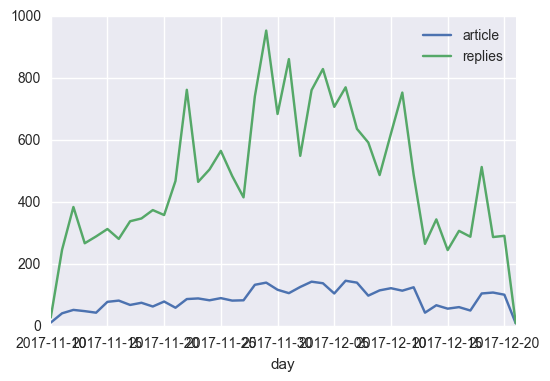

In [12]:
# insta_trends.plot(y = ['article','replies','likes','sum'])
insta_trends.plot(y = ['article','replies'])

# ÌÉúÍ∑∏ ÎπàÎèÑÏàò ÏÇ¥Ìé¥Î≥¥Í∏∞

In [13]:
# ÌÉúÍ∑∏ ÎπàÎèÑ Î∂ÑÏÑù1: ÏßëÍ≥Ñ

tag_lists = datas['tags'].tolist() # Ïù∏Ïä§ÌÉÄ ÌÅ¨Î°§ÎßÅ Í≤∞Í≥º Ï§ë ÌÉúÍ∑∏Î•º Í∞ÄÏ†∏Ïò®Îã§
tag_counts = insta.tag_counter(tag_lists)  # ÌÉúÍ∑∏ Ïπ¥Ïö¥Ìä∏ ÏßëÍ≥ÑÌïúÎã§
# tag_counts_chart(tag_counts, 20)    # ÏãúÍ∞ÅÌôî1) ÏÉÅÏúÑ ÌÉúÍ∑∏ Í∑∏ÎûòÌîÑÎ°ú ÌôïÏù∏Ìï®

for i,tag_count in enumerate(tag_counts[:50]):
    if i%5 ==0 : print('')
    print("'{}'".format(tag_count[0]), end=(' / '))


'#ÏïÑÎ¶¨Îî∞ÏõÄ' / '#ÏΩîÎçï' / '#ÏùºÏÉÅ' / '#ÌôîÏû•Ìíà' / '#Î∑∞Ìã∞Ïä§ÌÉÄÍ∑∏Îû®' / 
'#Îç∞ÏùºÎ¶¨' / '#Î∑∞Ìã∞' / '#motd' / '#Î©îÏù¥ÌÅ¨ÏóÖ' / '#daily' / 
'#makeup' / '#aritaum' / '#ÏóêÎõ∞ÎìúÌïòÏö∞Ïä§' / '#Î∑∞Ïä§ÌÉÄÍ∑∏Îû®' / '#ÎßûÌåî' / 
'#ÏÜåÌÜµ' / '#ÏΩîÎçïÏä§ÌÉÄÍ∑∏Îû®' / '#Ï¢ãÏïÑÏöî' / '#cosmetics' / '#ÏóêÎõ∞Îìú' / 
'#kbeauty' / '#ÎØ∏ÏÉ§' / '#selfie' / '#ÎßàÎ™ΩÎìú' / '#Î™®ÎÖ∏ÏïÑÏù¥Ï¶à' / 
'#Ïù¥ÎãàÏä§ÌîÑÎ¶¨' / '#ÏÑ†Ìåî' / '#beauty' / '#ÏÖÄÌîÑÎÑ§Ïùº' / '#ÌïúÏú®' / 
'#ÎÑ§ÏùºÏä§ÌÉÄÍ∑∏Îû®' / '#ÌåîÎ°úÏö∞' / '#ÌôÄÎ¶¨Îç∞Ïù¥Ïª¨Î†âÏÖò' / '#ÏΩîÏä§Î©îÌã±' / '#ÏÑÄÎèÑÏö∞' / 
'#Ìã¥Ìä∏' / '#ÎÑ§Ïùº' / '#ÎùºÎÑ§Ï¶à' / '#ÎçîÌéòÏù¥Ïä§ÏÉµ' / '#Î™®ÎîîÎÑ§Ïùº' / 
'#ÏÖÄÏä§ÌÉÄÍ∑∏Îû®' / '#ÎìúÎ¶¨ÎØ∏ÌôÄÎ¶¨Îç∞Ïù¥ÏÑÄÎèÑÌåîÎ†àÌä∏' / '#ÎÑ§ÏùºÏïÑÌä∏' / '#eotd' / '#ÏÇ¨ÏßÑ' / 
'#ÌôÄÎ¶¨Îç∞Ïù¥' / '#Î™®ÎîîÏ†§ÎÑ§ÏùºÎîîÏûêÏù∏ÌåÅ' / '#ÏùºÏÉÅÏä§ÌÉÄÍ∑∏Îû®' / '#ÌéòÎ¶¨ÌéòÎùº' / '#followme' / 

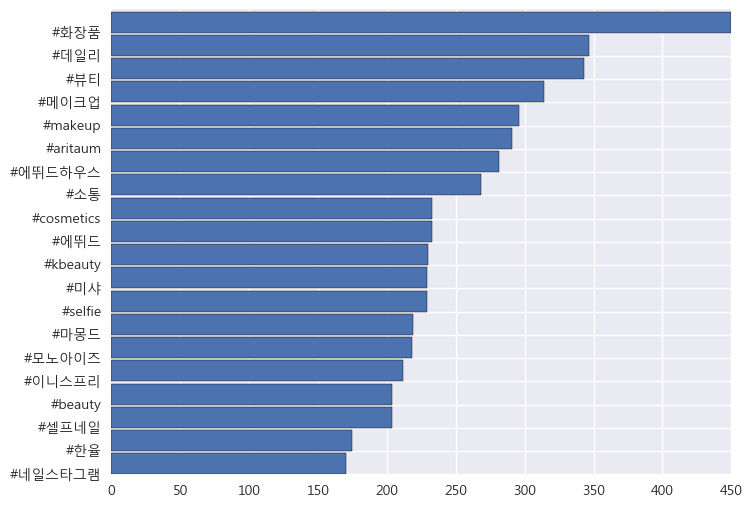

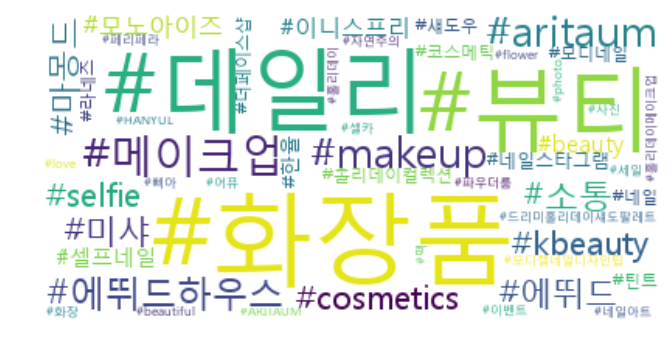

In [15]:
# ÌÉúÍ∑∏ ÎπàÎèÑ Î∂ÑÏÑù2: Ï†ïÎ¶¨ÌïòÍ∏∞
STOP = ['#ÏΩîÎçï', '#Î∑∞Ìã∞Ïä§ÌÉÄÍ∑∏Îû®', '#ÏΩîÎçïÏä§ÌÉÄÍ∑∏Îû®', '#Î∑∞Ïä§ÌÉÄÍ∑∏Îû®', '#motd', '#eotd', '#makeupoftheday', '#ÎßûÌåî', 
        '#ÏÑ†Ìåî', '#ÌôîÏû•ÌíàÏä§ÌÉÄÍ∑∏Îû®', '#ÌåîÎ°úÏö∞', '#Ïò§ÎäòÏùòÌôîÏû•', '#Ïò§ÎäòÏùòÎ©îÏù¥ÌÅ¨ÏóÖ', '#ÏùºÏÉÅÏä§ÌÉÄÍ∑∏Îû®', '#makeupoftheday', 
        '#ÏÑ†ÌåîÌôòÏòÅüôå', '#ÏïÑÎ¶¨Îî∞ÏõÄ', '#‰ªäÊó•„ÅÆ„É°„Ç§„ÇØ', '#daily', '#ÏùºÏÉÅ', '#Ï¢ãÏïÑÏöî',
       '#ÏÖÄÏä§ÌÉÄÍ∑∏Îû®', '#ÏáºÌïëÏä§ÌÉÄÍ∑∏Îû®','#MOTD', '#ÌïòÎäòÏïÑÎûòÍ∞ôÏùÄÏÉâÏ°∞ÎäîÏóÜÎã§', '#followme', '#korea']

tag_counts_selected = insta.tag_counter(tag_lists, STOP)    # Î∂àÏö©Ïñ¥ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ÌïúÎã§
insta.tag_counts_chart(tag_counts_selected, 20)    # ÏãúÍ∞ÅÌôî1) ÏÉÅÏúÑ ÌÉúÍ∑∏ Í∑∏ÎûòÌîÑÎ°ú ÌôïÏù∏Ìï®
insta.tag_wordcloud(tag_counts_selected,50)        # ÏãúÍ∞ÅÌôî2) ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú Í∑∏Î¶¨Í∏∞

In [16]:
# tag ÎπàÎèÑÏàò Ï†êÍ≤Ä(STOP Ï†úÏô∏)
for i,tag_count in enumerate(tag_counts[:100]):
    if i%5 ==0 : print('')
    if tag_count[0] not in STOP: print(tag_count[0], end=('/'))


#ÌôîÏû•Ìíà/
#Îç∞ÏùºÎ¶¨/#Î∑∞Ìã∞/#Î©îÏù¥ÌÅ¨ÏóÖ/
#makeup/#aritaum/#ÏóêÎõ∞ÎìúÌïòÏö∞Ïä§/
#ÏÜåÌÜµ/#cosmetics/#ÏóêÎõ∞Îìú/
#kbeauty/#ÎØ∏ÏÉ§/#selfie/#ÎßàÎ™ΩÎìú/#Î™®ÎÖ∏ÏïÑÏù¥Ï¶à/
#Ïù¥ÎãàÏä§ÌîÑÎ¶¨/#beauty/#ÏÖÄÌîÑÎÑ§Ïùº/#ÌïúÏú®/
#ÎÑ§ÏùºÏä§ÌÉÄÍ∑∏Îû®/#ÌôÄÎ¶¨Îç∞Ïù¥Ïª¨Î†âÏÖò/#ÏΩîÏä§Î©îÌã±/#ÏÑÄÎèÑÏö∞/
#Ìã¥Ìä∏/#ÎÑ§Ïùº/#ÎùºÎÑ§Ï¶à/#ÎçîÌéòÏù¥Ïä§ÏÉµ/#Î™®ÎîîÎÑ§Ïùº/
#ÎìúÎ¶¨ÎØ∏ÌôÄÎ¶¨Îç∞Ïù¥ÏÑÄÎèÑÌåîÎ†àÌä∏/#ÎÑ§ÏùºÏïÑÌä∏/#ÏÇ¨ÏßÑ/
#ÌôÄÎ¶¨Îç∞Ïù¥/#Î™®ÎîîÏ†§ÎÑ§ÏùºÎîîÏûêÏù∏ÌåÅ/#ÌéòÎ¶¨ÌéòÎùº/
#Ïù¥Î≤§Ìä∏/#ÏÇêÏïÑ/#HANYUL/#ÏÖÄÏπ¥/#photo/
#ÌôÄÎ¶¨Îç∞Ïù¥Î©îÏù¥ÌÅ¨ÏóÖ/#ÏûêÏó∞Ï£ºÏùò/#ARITAUM/#love/
#Îß•/#ÌååÏö∞ÎçîÎ£∏/#Ïñ¥Ìì®/#flower/#beautiful/
#ÌôîÏû•/#ÏÑ∏Ïùº/#Î™®Îîî/#Ï¥âÏ¥â/#event/
#lancome/#black/#rose/#onepiece/#ÏïÑÏù¥ÏÑÄÎèÑÏö∞/
#movie/#sexy/#ÏïÑÏù¥Ïò§Ìéò/#ÌíàÏúÑÏûàÎäîÍ∑∏ÎÖÄ/#apple/
#ÌûåÏßÄÏóîÌÑ∞ÌÖåÏù∏Î®ºÌä∏/#star/#ÌÇ§Ïä§ÎØ∏/#game/#kimheeseon/
#hot/#lovely/#princess/#ÈáëÂñúÂñÑ/#Style/
#ÏïÑÎ™®Î†àÌçºÏãúÌîΩ/#ÌååÏö∞ÎçîÎ£∏Ïù¥Î≤§Ìä∏/#ÌååÏö∞ÎçîÎ£∏Ï≤¥ÌóòÎã®/#ÏÖÄÌîº/#eyemakeup/
#Î¶ΩÏä§Ìã±/#ÌôÄÎ¶¨Ïπ¥ÌôÄÎ¶¨Ïπ¥/#Îç∞ÏùºÎ¶¨Î©îÏù¥ÌÅ¨ÏóÖ/

# ÌÉúÍ∑∏ SNA 

[('#ÌôîÏû•Ìíà', '#Î∑∞Ìã∞', 138), ('#makeup', '#Î©îÏù¥ÌÅ¨ÏóÖ', 132), ('#Î©îÏù¥ÌÅ¨ÏóÖ', '#Î∑∞Ìã∞', 122), ('#beauty', '#Î∑∞Ìã∞', 115), ('#Î∑∞Ìã∞', '#Îç∞ÏùºÎ¶¨', 114), ('#ÎÑ§ÏùºÏä§ÌÉÄÍ∑∏Îû®', '#ÏÖÄÌîÑÎÑ§Ïùº', 112), ('#ÌïúÏú®', '#kbeauty', 109), ('#ÏÖÄÌîÑÎÑ§Ïùº', '#Î™®ÎîîÏ†§ÎÑ§ÏùºÎîîÏûêÏù∏ÌåÅ', 107), ('#cosmetics', '#makeup', 106), ('#ÌïúÏú®', '#HANYUL', 103), ('#ÌïúÏú®', '#ÏûêÏó∞Ï£ºÏùò', 102), ('#cosmetics', '#ÌôîÏû•Ìíà', 100), ('#HANYUL', '#kbeauty', 98), ('#selfie', '#photo', 98), ('#ÏÜåÌÜµ', '#Îç∞ÏùºÎ¶¨', 98), ('#HANYUL', '#ÏûêÏó∞Ï£ºÏùò', 97), ('#ÏûêÏó∞Ï£ºÏùò', '#kbeauty', 96), ('#makeup', '#beauty', 95), ('#Î©îÏù¥ÌÅ¨ÏóÖ', '#Îç∞ÏùºÎ¶¨', 95), ('#ÌôÄÎ¶¨Îç∞Ïù¥Ïª¨Î†âÏÖò', '#ÎìúÎ¶¨ÎØ∏ÌôÄÎ¶¨Îç∞Ïù¥ÏÑÄÎèÑÌåîÎ†àÌä∏', 94)]


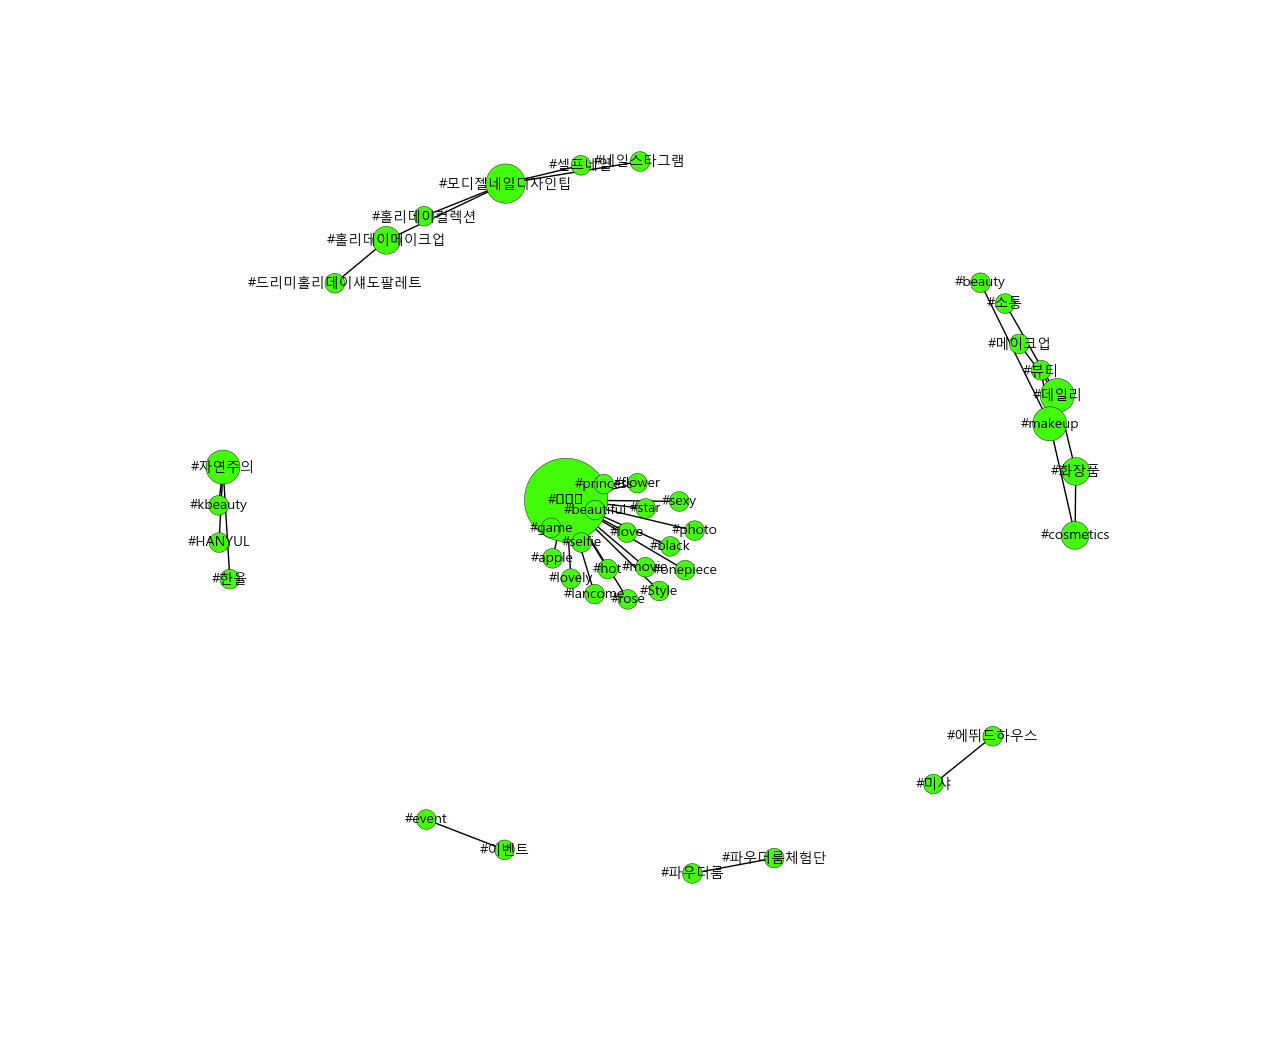

In [27]:
STOP = ['#ÏΩîÎçï', '#Î∑∞Ìã∞Ïä§ÌÉÄÍ∑∏Îû®', '#ÏΩîÎçïÏä§ÌÉÄÍ∑∏Îû®', '#Î∑∞Ïä§ÌÉÄÍ∑∏Îû®', '#motd', '#eotd', '#makeupoftheday', '#ÎßûÌåî', 
        '#ÏÑ†Ìåî', '#ÌôîÏû•ÌíàÏä§ÌÉÄÍ∑∏Îû®', '#ÌåîÎ°úÏö∞', '#Ïò§ÎäòÏùòÌôîÏû•', '#Ïò§ÎäòÏùòÎ©îÏù¥ÌÅ¨ÏóÖ', '#ÏùºÏÉÅÏä§ÌÉÄÍ∑∏Îû®', '#makeupoftheday', 
        '#ÏÑ†ÌåîÌôòÏòÅüôå', '#ÏïÑÎ¶¨Îî∞ÏõÄ', '#‰ªäÊó•„ÅÆ„É°„Ç§„ÇØ', '#daily', '#ÏùºÏÉÅ', '#Ï¢ãÏïÑÏöî',
       '#ÏÖÄÏä§ÌÉÄÍ∑∏Îû®', '#ÏáºÌïëÏä§ÌÉÄÍ∑∏Îû®','#MOTD', '#ÌïòÎäòÏïÑÎûòÍ∞ôÏùÄÏÉâÏ°∞ÎäîÏóÜÎã§', '#followme', '#korea',
       '#kimheeseon', '#ÏÇ¨ÏßÑ','#ÌûåÏßÄÏóîÌÑ∞ÌÖåÏù∏Î®ºÌä∏','#ÍπÄÌù¨ÏÑ†','#ÍπÄÌù¨ÏÑ†ÏÑ∏ÏÉÅ','#ÌíàÏúÑÏûàÎäîÍ∑∏ÎÖÄ']
# must = ['#Í∞ïÏïÑÏßÄÏäµÏßÑ', '#Í∞ïÏïÑÏßÄÏÉ¥Ìë∏','#Í∞ïÏïÑÏßÄÎπÑÎàÑ']
must = None

tags_raw = datas['tags'].dropna().tolist() # Ïù∏Ïä§ÌÉÄ ÌÅ¨Î°§ÎßÅ Í≤∞Í≥º Ï§ë ÌÉúÍ∑∏Î•º Í∞ÄÏ†∏Ïò®Îã§
tag_lists = insta.tag_lists_selector(tags_raw)
word_cooc = insta.word_matrix(tag_lists, stop=STOP, must=must)
print(word_cooc[:20])

fname = './data/ÏïÑÎ¶¨Îî∞ÏõÄv6_200(ÍπÄÌù¨ÏÑ†Ï†úÏô∏)'
# insta.word_sna_graph(word_cooc,70,fname) #Ï†ÄÏû•Ìï†Í≤ΩÏö∞

insta.word_sna_graph(word_cooc,200)  # Ï†ÄÏû•ÌïòÏßÄ ÏïäÏùÑ Í≤ΩÏö∞


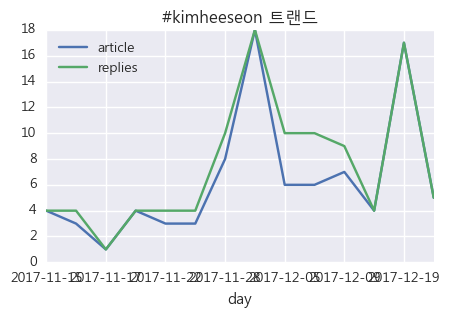

In [28]:
#ÌäπÏ†ïÎã®Ïñ¥ ÏÇ¥Ìé¥Î≥¥Í∏∞
WORD = '#kimheeseon'
word_trends = insta.insta_trends_word(datas, WORD)
# word_trends.plot(y = ['article','replies','likes','sum'], title = '{} Ìä∏ÎûúÎìú'.format(WORD), figsize=(5,3))
word_trends.plot(y = ['article','replies'], title = '{} Ìä∏ÎûúÎìú'.format(WORD),figsize=(5,3))

# ÏõåÎìúÌà¨Î≤°

In [21]:
model = insta.make_word2vec(tags_raw, STOP=STOP)

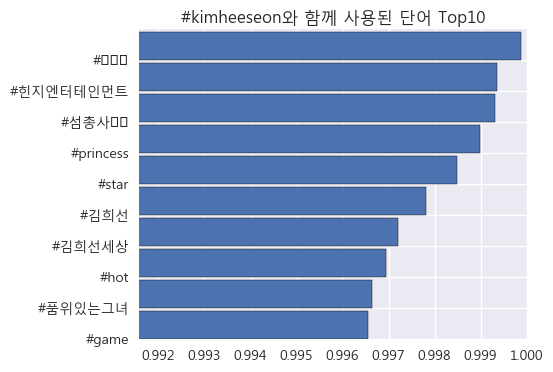

In [29]:
selected_words = ['#kimheeseon']
for word in selected_words:
    insta.word2vec_similar(model, word, topn=10)
    
